## Predictive Model – Bagging and Stacking Algorithm:

In this blog, we will try to learn Ensemble Technique of Machine learning i.e. Bagging and Stacking algorithm and its python implementation. 

Note: We have already covered another Ensemble technique i.e. Boosting in another blog. Link is given below :
#### https://datasciencewithabhi.blogspot.com/2020/06/predictive-modeling-boosting-algorithms.html

To understand the implementation cycle, please see the following blog:
#### https://datasciencewithabhi.blogspot.com/2020/03/life-cycle-of-machine-learningml-project.html

** Please note that as part of this blog, we are not going for data collection or model deployment as part of implementation. Data is already available. In later blogs, we will cover some of the model selection techniques, deployment etc., as separate topics. Each of the areas like EDA, model selection, parameter hyper tuning etc. is vast and has many ways to do it. As part of different blogs, we will cover the different methods in each of the above mentioned area. Goal is to get the idea of model/intuition and implementation first and then more exploration in each of the topic can be done later. 


## Bagging (Bootstrap Aggregation) : 

Bagging is also known as Bootstap aggregation . 

Before we understand Bagging, lets understand __What is Bootstrap?__

The bootstrap method is a resampling technique used to estimate statistics on a population by sampling a dataset with replacement. Let's see the example below for calculating the mean height of the school with and without Bootstraping:

__without Bootstraping:__

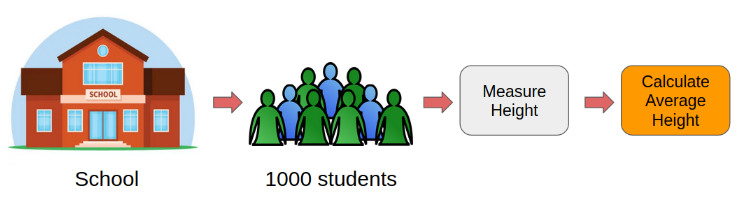


__with bootstraping:__

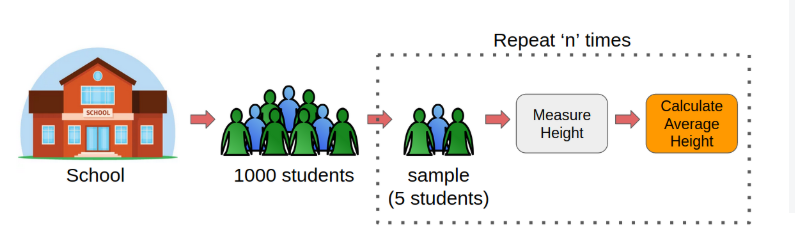

In Bootstraping sampling , we can see that instead of measuring the heights of all the students, we can draw a random sample of 5 students and measure their heights. We would repeat this process 20 times and then average the collected height data of 100 students (5 x 20). This average height would be an estimate of the mean height of all the students of the school.

__What is Bagging(Bootstrap aggregation)__

Bagging is the type of ensemble technique in which a single training algorithm is used on different subsets of the training data where the subset sampling is done with replacement (bootstrap). 
Once the algorithm is trained on all the subsets, then bagging makes the prediction by aggregating all the predictions made by the algorithm on different subsets. In case of regression, bagging prediction is simply the mean of all the predictions and in the case of classifier, bagging prediction is the most frequent prediction (majority vote) among all the predictions.

Bagging is also known as parallel model since we run all models parallely and combine there results at the end.

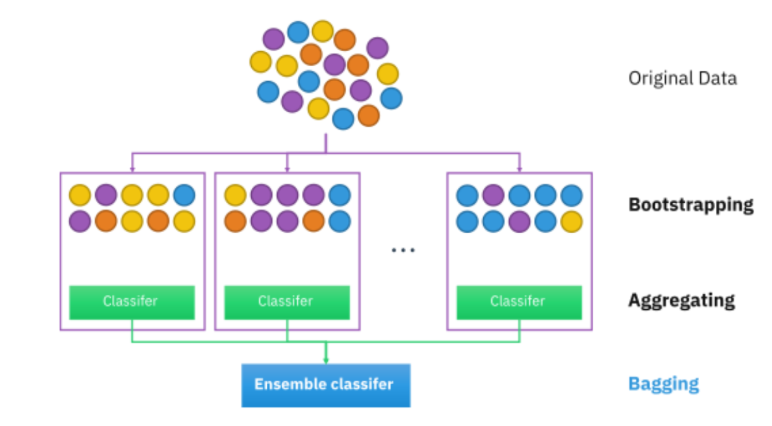

__Advantages of a Bagging Model__

1)	Bagging significantly decreases the variance without increasing bias. 

2)	Bagging methods work so well because of diversity in the training data since the sampling is done by bootstraping.

3)	Also, if the training set is very huge, it can save computional time by training model on relatively smaller data set and still can increase the accuracy of the model.

4) Works well with small datasets as well.

__Disadvantage of a Bagging Model__

The main disadvantage of Bagging is that it improves the accuracy of the model on the expense of interpretability i.e. if a single tree was being used as the base model, then it would have a more attarctive and easily interpretable diagram, but with use of bagging this interpretability gets lost.

### Pasting

Pasting is an ensemble technique similar to bagging with the only difference being that there is no replacement done while sampling the training dataset. This causes less diversity in the sampled datasets and data ends up being correlated. That's why bagging is more preffered than pasting in real scenarios.

### Out-of-Bag Evaluation

In bagging, when different samples are collected, no sample contains all the data but a fraction of the original dataset.
There might be some data which are never sampled at all. The remaining data which are not sampled are called out of bag instances. Since the model never trains over these data, they can be used for evaluating the accuracy of the model by using these data for predicition. We do not need validation set or cross validation and can use out of bag instances for that purpose.

Let's see python implementation of bagging :


In [16]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd 
import numpy as np

In [21]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer() ## data set that comes with sklearn library

In [53]:
X = dataset.data
y = dataset.target
x_dataframe=pd.DataFrame(X)
y_dataframe=pd.DataFrame(y)
pd.concat([x_dataframe,y_dataframe], axis=1).head() ## to visualize the data

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,0
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=3
)

In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.916083916083916

let's using bagging over our KNN classifier and see if our score improves:

In [28]:
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                            n_estimators=10, max_samples=0.5,
                            bootstrap=True, random_state=3,oob_score=True) 

In [29]:
#Let's check the out of bag score 
bag_knn.oob_score

True

In [30]:
bag_knn.fit(X_train, y_train)
bag_knn.score(X_test, y_test)

0.9370629370629371

Yes , bagging has improved the prediction quality . 

Let's use pasting instead of bootstrap.

In [31]:
pasting_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                            n_estimators=10, max_samples=0.5,
                            bootstrap=False, random_state=3) 

In [32]:
pasting_knn.fit(X_train, y_train)
pasting_knn.score(X_test, y_test)

0.9300699300699301

Yes , pasting also improved the prediction quality from the case where we have not used any sampling method . 

### Random Forest

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

The fundamental concept behind random forest is a simple but powerful one — the wisdom of crowds. In data science speak, the reason that the random forest model works so well is:

A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.

A visual diagram for Random Forest :
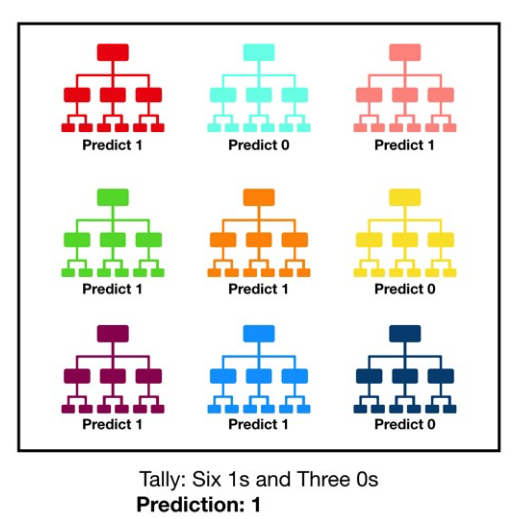

This is improvement from CART (Classificaiton and Regression Tree) algorithm. Random forest changes the algorithm for the way that the sub-trees are learned so that the resulting predictions from all of the subtrees have less correlation.

It is a simple tweak. In CART, when selecting a split point, the learning algorithm is allowed to look through all variables and all variable values in order to select the most optimal split-point. The random forest algorithm changes this procedure so that the learning algorithm is limited to a random sample of features of which to search.

The number of features that can be searched at each split point (m) must be specified as a parameter to the algorithm. You can try different values and tune it using cross validation.

For classification a good default is: m = sqrt(p)

For regression a good default is: m = p/3

Where m is the number of randomly selected features that can be searched at a split point and p is the number of input variables.

#### Advantages and Disadvantages of Random Forest:

1)	It can be used for both regression and classification problems.

2)	Since base model is a tree, handling of missing values is easy.

3)	It gives very accurate result with very low variance.

4)	Results of a random forest are very hard to interpret in comparison with decision trees.

5)	High computational time than other respective models.


Random Forest should be used where accuracy is up utmost priority and interpretability is not very important. Also, computational time is less expensive than the desired outcome.


Let's see a python implementation of RandomForest .

#### Problem :
We will use 'Winequality_red.csv' file for demonstration. This file contain different data for different factor (to predict the wine quality) and the wine qulaity data .

Dataset can be found at following location :
https://github.com/abhishek-knowledge-incubator/DataScience/blob/master/Bagging/winequality_red.csv

#### Solution :

In [54]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

C:\ProgramData\Anaconda2\envs\py37\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [56]:
data = pd.read_csv("winequality_red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [57]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [58]:
X = data.drop(columns = 'quality')
y = data['quality']

In [59]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 355)

In [62]:
#let's first visualize the tree on the data without doing any pre processing
clf2 = DecisionTreeClassifier(criterion = 'entropy', max_depth =24, min_samples_leaf= 1)
clf2.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=24,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [63]:
clf2.score(x_test,y_test)

0.6166666666666667

Let's use RandomForestClassifier now .

In [64]:
rand_clf = RandomForestClassifier(random_state=6)

In [65]:
rand_clf.fit(x_train,y_train)

C:\ProgramData\Anaconda2\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=6, verbose=0,
                       warm_start=False)

In [66]:
rand_clf.score(x_test,y_test)

0.64375

So, using random forest classifier has increased the predicitive power of our model. 

Let's do some hyperparameter tuning and see if we can increase our accuracy more.

* Hyperparameters of Decision tree: 

class_weight=None, criterion='entropy', max_depth=24,max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'
                    
* Hyperparameters of Bagging classifier:

base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False
                  
* Hyperparameters of Random forest classifier:

bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False

Let's now try to tune some hyperparameters using the GridSearchCV algorithm.

GridSearchCV is a method used to tune our hyperparameters. We can pass different values of hyperparameters as parameters for grid search.
It does a exhaustive generation of combination of different parameters passed.
Using cross validation score, Grid Search returns the combination of hyperparameters for which the model is performing the best. 

Note that it is common that a small subset of those parameters can have a large impact on the predictive or computation performance of the model while others can be left to their default values. 

In [75]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [76]:
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [78]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 20736 candidates, totalling 103680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:   44.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 6264 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | e

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=6,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'criteri

In [79]:
#let's see the best parameters as per our grid search
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 13,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

paas the above parameter to Random Forest Classifier.

In [80]:
rand_clf = RandomForestClassifier(criterion= 'entropy',
 max_depth = 13,
 max_features = 'auto',
 min_samples_leaf = 1,
 min_samples_split= 4,
 n_estimators = 100,random_state=6)

In [81]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=13, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=6, verbose=0,
                       warm_start=False)

In [82]:
rand_clf.score(x_test,y_test)

0.6708333333333333

With the help of hypermeter tuning , we were able to increase the accuracy of the model

Let's do some more tweaking to hypermeter 

In [83]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf' : [1,2,3,4,5],
    'min_samples_split': [4,5,6,7,8],
    'max_features' : ['auto','log2']
}

In [85]:
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [86]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:   50.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  3.3min finished
C:\ProgramData\Anaconda2\envs\py37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy', max_depth=13,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=4,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=6,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'crite

In [87]:
#let's see the best parameters as per our grid search
grid_search.best_params_

{'criterion': 'entropy',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

In [88]:
rand_clf = RandomForestClassifier(criterion= 'entropy',
 max_features = 'auto',
 min_samples_leaf = 1,
 min_samples_split= 4,
 n_estimators = 100,random_state=6)

In [89]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=6, verbose=0,
                       warm_start=False)

In [90]:
rand_clf.score(x_test,y_test)

0.675

### Stacking 

Stacking mainly differ from bagging and boosting on two points. First stacking often considers heterogeneous weak learners (different learning algorithms are combined) whereas bagging and boosting consider mainly homogeneous weak learners. Second, stacking learns to combine the base models using a meta-model whereas bagging and boosting combine weak learners following deterministic algorithms.

The idea of stacking is to learn several different weak learners and combine them by training a meta-model to output predictions based on the multiple predictions returned by these weak models. So, we need to define two things in order to build our stacking model: the L learners we want to fit and the meta-model that combines them.

For example, for a classification problem, we can choose as weak learners a KNN classifier, a logistic regression and a SVM, and decide to learn a neural network as meta-model. Then, the neural network will take as inputs the outputs of our three weak learners and will learn to return final predictions based on it.

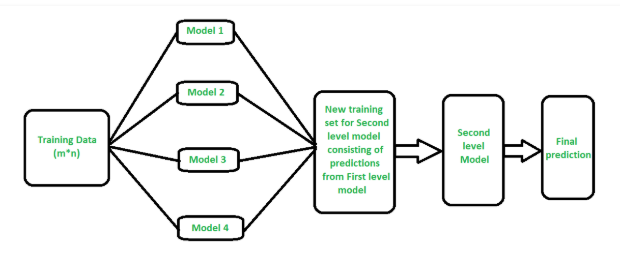

Let's understand more by looking at the steps involved for stacking:

1.	Split the dataset into a training set and a holdout set. We can use k-fold validation for seleting different set of validation sets.

   Generally, we do a 50-50 split of the training set and the hold out set. 
   
   training set = x1,y1
   hold out set = x2, y2

2.	Split the training set again into training and test dataset e.g. x1_train, y1_train, x1_test, y1_test

3.	Train all the base models on training set  x1_train, y1_train.

4.	After training is done, get the predictions of all the base models on the validation set x2. 

5.	Stack all these predictions together (you can also take an average of all the predictions or probability prediction) as it will be used as input feature for the meta_model.

6.	Again, get the prediction for all the base models on the test set i.e. x1_test 

7.	Again, stack all these predictions together (you can also take an average of all the predictions or probability prediction) as it will be used as the prediction dataset for the meta_model.

8.	Use the stacked data from step 5 as the input feature for meta_model and validation set y2 as the target variable and train the model on these data.

9.	Once, the training is done check the accuracy of meta_model by using data from step 7 for prediction and y1_test for evaluation.



#### Problem Statement :
Predicting diabetes based on cetain independent parameters . We will use 'diabetes.csv' file for implementation .

Data file can be found at following location:
https://github.com/abhishek-knowledge-incubator/DataScience/blob/master/Bagging/diabetes.csv

#### Solution


In [93]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np

In [94]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [95]:
X = data.drop(columns = 'Outcome')
y = data['Outcome']

In [96]:
# let's divide our dataset into training set and hold out set by 50%
train,val_train,test,val_test = train_test_split(X,y,test_size=0.5, random_state= 355)

In [97]:
# let's split the training set again into training and test dataset 
x_train,x_test,y_train,y_test =  train_test_split(train,test,test_size=0.2, random_state= 355)

We will use Knn and SVM as base model

In [98]:
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [99]:
knn.score(x_test,y_test)

0.7402597402597403

In [100]:
svm = SVC()
svm.fit(x_train,y_train)

C:\ProgramData\Anaconda2\envs\py37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [101]:
svm.score(x_test,y_test)

0.6493506493506493

In [103]:
#Let's get the predictions of all the base models on the validation set val_train.
predict_val1 = knn.predict(val_train)
predict_val2 = svm.predict(val_train)

In [113]:
## stacking the predicted value for train data
predict_val = np.column_stack((predict_val1,predict_val2))
##predict_val -- for visualizing the predicted valued 

In [114]:
predict_test1 = knn.predict(x_test)
predict_test2 = svm.predict(x_test)

In [115]:
## stacking the predicted value for test data
predict_test = np.column_stack((predict_test1,predict_test2))
##predict_test -- for visualizing the predicted valued 

In [116]:
rand_clf = RandomForestClassifier()

rand_clf.fit(predict_val,val_test)

C:\ProgramData\Anaconda2\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [117]:
rand_clf.score(predict_test,y_test)

0.7402597402597403

In [118]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf' : [1,2,3,4,5],
    'min_samples_split': [4,5,6,7,8],
    'max_features' : ['auto','log2']
}

In [119]:
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [120]:
grid_search.fit(predict_val,val_test)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  2.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='wa

In [121]:
grid_search.best_params_

{'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 90}

In [122]:
rand_clf = RandomForestClassifier( criterion='gini',max_features = 'auto',min_samples_leaf =1,min_samples_split= 4,n_estimators =90)

In [123]:
rand_clf.fit(predict_val,val_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [124]:
rand_clf.score(predict_test,y_test)

0.7402597402597403

__Let’s end the blog here. Summary of what we have learned in this blog:__
1.	Bootstrap
2.  Bagging  
3.  Random Forest
4.  Stacking


### References: 	
1.  https://www.analyticsvidhya.com/blog/2020/02/what-is-bootstrap-sampling-in-statistics-and-machine-learning/
2.  https://towardsdatascience.com/understanding-random-forest-58381e0602d2
3.  https://machinelearningmastery.com/bagging-and-random-forest-ensemble-algorithms-for-machine-learning/
4.  https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205
5.  https://www.geeksforgeeks.org/stacking-in-machine-learning/


### Additional Reads:
1. Kd tree
https://courses.cs.washington.edu/courses/cse547/17sp/slides/kNN-kdtrees-2.pdf




### Follow my blog: https://datasciencewithabhi.blogspot.com/
